In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def pltGray(img):
    plt.imshow(img, cmap='gray')

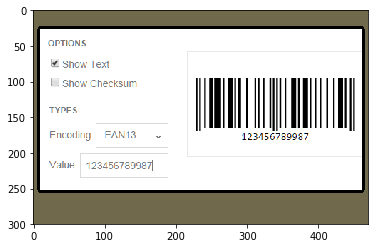

In [5]:
image = cv2.imread('barcode_detection_imgs/asp-net-mvc-barcode-api.png')
plt.imshow(image)

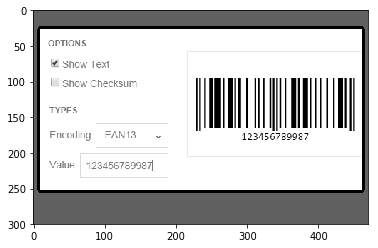

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

Compute the Scharr Gradient magnitude representation on both x and y

In [55]:
grayX = cv2.Sobel(gray, ddepth=cv2.CV_8UC1, dx = 1, dy = 0, ksize = -1)
grayY = cv2.Sobel(gray, ddepth=cv2.CV_8UC1, dx = 0, dy = 1, ksize = -1)

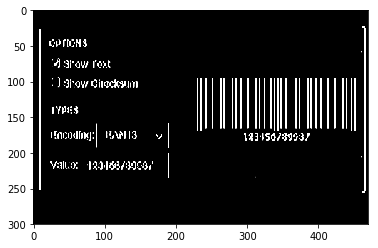

In [56]:
plt.imshow(grayX, cmap='gray')

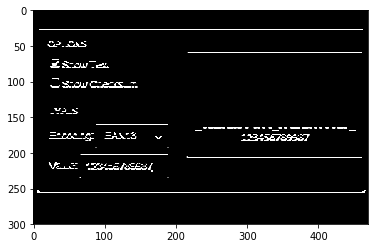

In [57]:
plt.imshow(grayY, cmap='gray')

Substract the y-gradient from the x - gradient

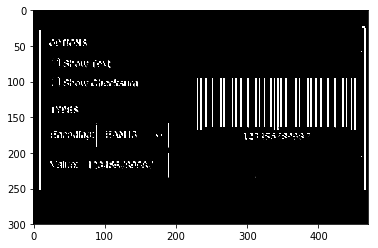

In [58]:
gradient = cv2.subtract(grayX, grayY)
plt.imshow(gradient, cmap='gray')

Filter out the noise and retain the bar code using the blur
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

In [77]:
kernel = (9, 9)
blurred = cv2.blur(gradient, kernel)

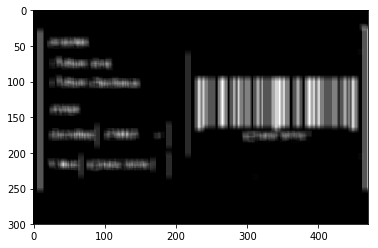

In [78]:
plt.imshow(blurred, cmap='gray')

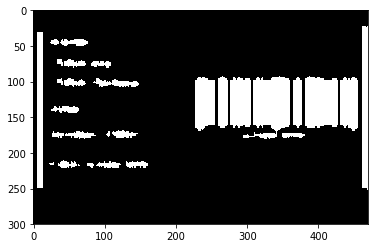

In [93]:
(_, thresh) = cv2.threshold(blurred, 47, 225, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

https://docs.opencv.org/3.0-beta/_images/j.png

1. Erosion - kernal size is set traversed like in 2D convolution, set all pixels to 1 if all pixels are 1 else sett all pixels to 0.
2. Dilation - viseversa.
3. Opening - Erosion followed by Dilation
4. Closing - Dilation followed by Erosion
...

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

In [94]:
kernelMorp = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernelMorp)

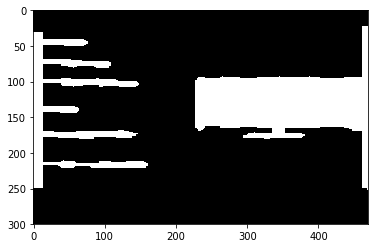

In [95]:
plt.imshow(closed, cmap='gray')

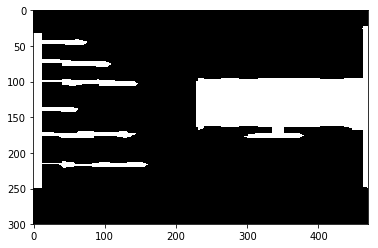

In [96]:
closedEr = cv2.erode(closed, None, iterations = 1)
plt.imshow(closedEr, cmap='gray')

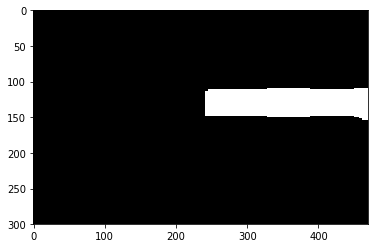

In [97]:
closedEr = cv2.erode(closed, None, iterations = 15)
plt.imshow(closedEr, cmap='gray')

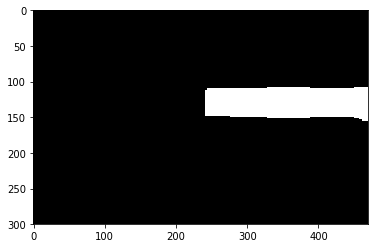

In [98]:
closedDil = cv2.dilate(closedEr, None, iterations = 1)
pltGray(closedDil)

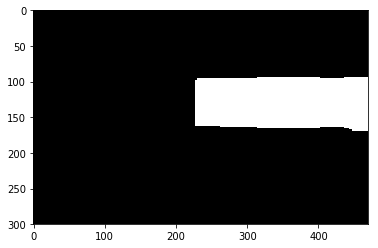

In [99]:
closedDil = cv2.dilate(closedEr, None, iterations = 15)
pltGray(closedDil)

Find Contours and draw

https://docs.opencv.org/trunk/dd/d49/tutorial_py_contour_features.html

In [100]:
print(closedDil.shape)

(300, 470)


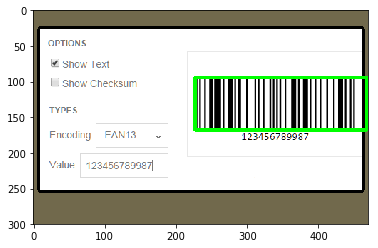

In [108]:
# (cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
(_, cnts, _) = cv2.findContours(closedDil.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
plt.imshow(image)